<a href="https://colab.research.google.com/github/surkovvv/TinkoffML_Fall2021/blob/main/linear_regression_HW_Surkov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### (0 баллов) Считываем данные

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

dataset = load_boston()
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Каждая квартира имеет 13 признаков:

In [ ]:
X = dataset['data']
X[:10]

In [4]:
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Хочется научиться предсказывать функцию цены квартиры. Предположительно, она зависит как-то от этих признаков.

In [6]:
y = dataset['target']
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

### (1 балл) Разделите данные на тренировочную и тестовую части.

Тестовая часть должна составлять 10% выборки.


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=42)

### (1 балл) Обучение и применение модели
Обучите модель линейной регрессии на тренировочной части и предскажите результаты на тестовой части.



In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

### (2 балл) Валидация результата

Напишите свою функцию MSE, убедитесь, что она совпадает с реализацией из sklearn и посчитайте своей результат на тестовой части.

In [14]:
from sklearn.metrics import mean_squared_error
def MSE(y_real, y_pred):
    return (y_real - y_pred).T @ (y_real - y_pred) / y_real.shape[0]

In [15]:
print("My MSE {} vs sklearn MSE {}".format(MSE(y_pred, y_test), mean_squared_error(y_pred, y_test)))

My MSE 14.99585287658254 vs sklearn MSE 14.99585287658254


Насколько хорошо вы предсказали цену? Сравните с наивным алгоритмом (предсказать среднюю цену на тренировочной части вне зависимости от признаков).

In [16]:
y_mean = y_train.mean()

In [20]:
print("MSE's of mean target = {:.3f}, and first prediction = {:.3f}".format(MSE(y_mean * np.ones(y_train.shape[0]), y_train), MSE(y_pred, y_test)))

MSE's of mean target = 86.624, and first prediction = 14.996


### (2 балла) Улучшите результат.

Возможно, происходит переобучение, попробуйте применить регуляризацию, чтобы улучшить результат (то есть используйте Ridge вместо LinearRegression).

Нарисуйте график зависимости MSE от коэффициента регуляризации.

In [24]:
from sklearn.linear_model import Ridge

lambdas = np.linspace(0.05, 2, num=15)
errors = []

for lambda_ in lambdas:
    model = Ridge(alpha=lambda_)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    errors.append(MSE(y_pred, y_test)) 

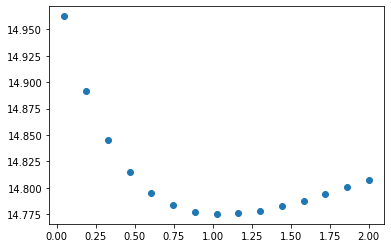

In [28]:
plt.scatter(x=lambdas, y=errors)

Помогает ли регуляризация? Какой коэффициент регуляризации надо выбрать, чтобы ошибка была минимальной? Чему при этом равна ошибка? Напишите выводы о проведенных экспериментах

In [33]:
best_lambda, lowest_mse = min(zip(lambdas, errors), key= lambda x : x[1])
print("Min MSE is {:.3f} on the coef equal to {:.3f}".format(lowest_mse, best_lambda))

Min MSE is 14.775 on the coef equal to 1.025


### Как видно, регуляризация сделала свое дело и уменьшила ошибку с 14.996 до 14.775, поэтому в данном случае можно считать, что регуляризация нам помогла.